In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras import optimizers
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K


rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

Using TensorFlow backend.
/Users/knuth/miniconda3/envs/amath/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/knuth/miniconda3/envs/amath/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/knuth/miniconda3/envs/amath/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/knuth/minicon

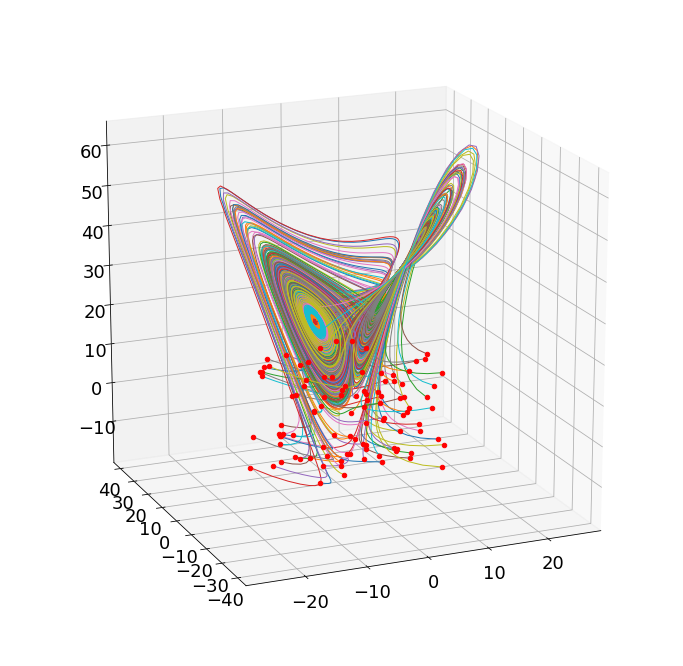

In [2]:
## Simulate the Lorenz System

dt = 0.01
T = 8
t = np.arange(0,T+dt,dt)
beta = 8/3
sigma = 10
rho = 28


nn_input = np.zeros((100*(len(t)-1),3))
nn_output = np.zeros_like(nn_input)

fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})


def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

np.random.seed(123)
x0 = -15 + 30 * np.random.random((100, 3))

x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t)
                  for x0_j in x0])

for j in range(100):
    nn_input[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,:-1,:]
    nn_output[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,1:,:]
    x, y, z = x_t[j,:,:].T
    ax.plot(x, y, z,linewidth=1)
    ax.scatter(x0[j,0],x0[j,1],x0[j,2],color='r')
             
ax.view_init(18, -113)
plt.show()

In [29]:
## Neural Net

# Define activation functions
def logsig(x):
    return K.variable(np.divide(1,(1+np.exp(-K.eval(x)))))

def radbas(x):
    return K.variable(np.exp(-np.power(K.eval(x),2)))

def purelin(x):
    return x

In [30]:
# from keras.layers import Activation

# activation_logsig = Activation(logsig, name = 'a_logsig')
# activation_radbas = Activation(radbas, name = 'a_radbas')
# activation_purelin = Activation(purelin, name = 'a_purelin')

In [32]:
#create model
model = Sequential()

#add model layers
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(3))

sgd_optimizer = optimizers.SGD(momentum=0.9)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')
model.fit(nn_input, nn_output, epochs=30)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
80000/80000 [==============================] - 2s 27us/step - loss: -7.7934
Epoch 2/30
80000/80000 [==============================] - 2s 26us/step - loss: -7.8142
Epoch 3/30
80000/80000 [==============================] - 2s 26us/step - loss: -7.8142
Epoch 4/30
80000/80000 [==============================] - 2s 26us/step - loss: -7.8142
Epoch 5/30
80000/80000 [==============================] - 2s 26us/step - loss: -7.8142
Epoch 6/30
80000/80000 [==============================] - 2s 27us/step - loss: -7.8142
Epoch 7/30
80000/80000 [==============================] - 2s 26us/step - loss: -7.8142
Epoch 8/30
80000/80000 [==============================] - 2s 26us/step - loss: -7.8142
Epoch 9/30
80000/80000 [==============================] - 2s 26us/step - loss: -7.8142
Epoch 10/30
80000/80000 [==============================] - 2s 26us/step - loss: -7.8142
Epoch 11/30
80000/80000 [==============================] - 2s 27us/step - loss: -

In [34]:
model.

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 10)                40        
_________________________________________________________________
dense_29 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_30 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_31 (Dense)             (None, 3)                 33        
Total params: 293
Trainable params: 293
Non-trainable params: 0
_________________________________________________________________
